In [1]:
using DataStructures
using StatsPlots
using DataFrames
PW_PATH = "/home/tom/MSC_Rostock/Network_Security/Password_Files/Realhuman/"
PW_SC_DB_PATH = "/home/tom/MSC_Rostock/Network_Security/Password_Files/Realhuman_with_sc_list"

"/home/tom/MSC_Rostock/Network_Security/Password_Files/Realhuman_with_sc_list"

In [2]:
special_char_regex = r"[^A-Za-z0-9]"
special_char_matcher(s::AbstractString) = match(special_char_regex, s) != nothing

special_char_matcher (generic function with 1 method)

## Loop through password databases and get those with special characters

In [3]:
pw_ct = 0
pw_ct_sc = 0
io = open(PW_SC_DB_PATH, "w")
for pw_db_path in readdir(PW_PATH, join=true)
    println(pw_db_path)
    ct = 0
    ct_sc = 0
    for pw in eachline(pw_db_path)
        try
            s = ascii(pw) # some lines are dirty - outliers
            if 0 < length(s) <= 30 # some lines are very long - outliers
                ct += 1
                if special_char_matcher(s)
                    ct_sc += 1
                    println(io, s)
                end
            end
            catch e
        end
    end
    println("\t $ct valid passwords $ct_sc with special")
    pw_ct += ct
    pw_ct_sc += ct_sc
end
close(io)
"Found $pw_ct valid passwords and $pw_ct_sc pws with special characters"

/home/tom/MSC_Rostock/Network_Security/Password_Files/Realhuman/realhuman_phill.txt
	 62980023 valid passwords 10169545 with special


"Found 62980023 valid passwords and 10169545 pws with special characters"

## Count positions per special character

In [4]:
special_char_positions(s::AbstractString) = ((first(m.match), m.offset) for m in eachmatch(special_char_regex, s))
sc_p_counter = Dict{Char, Accumulator{Int, Int}}()

Dict{Char, Accumulator{Int64, Int64}}()

In [5]:
for pw in eachline(PW_SC_DB_PATH)
    for (c, p) in special_char_positions(pw)
        p_counter = get!(sc_p_counter, c, counter(Int))
        inc!(p_counter, p)
    end
end
join(keys(sc_p_counter), " ")

"] < ; ^ @ \x7f ? ( , \\ \x0f ~ # \x01 \e + \t \x03 \x19 } ` [ ' \b : \" \x02 \x05 * / \x1c = \$ - _ . { ! & ) >   \x1a | %"

## Calculate statistics and show histogram

In [6]:
sc_ct_total = Dict(c => sum(sc_p_counter[c]) for c in keys(sc_p_counter))
sc_ct_df = DataFrame(:Character => collect(keys(sc_ct_total)), :Total => collect(values(sc_ct_total)))
sort!(sc_ct_df, :Total, rev=true)
pos_max = maximum(maximum(keys(d)) for d in values(sc_p_counter))
pos_ct_total = [sum(get(d,i,0) for d in values(sc_p_counter)) for i in 1:pos_max]
pos_ct_df = DataFrame(:Position => collect(1:pos_max), :Total => pos_ct_total)
sort!(pos_ct_df, :Total, rev=true);

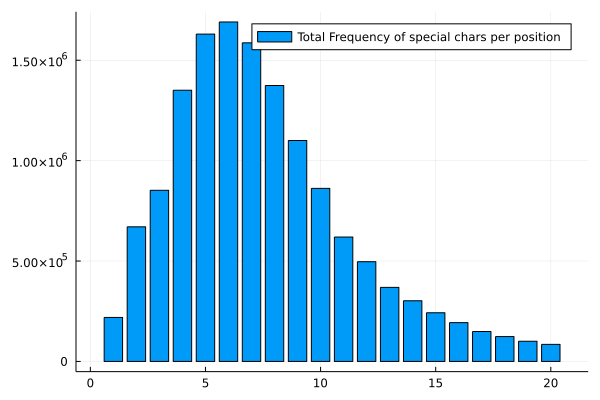

In [7]:
cols = [:Position, :Total]
@df pos_ct_df[1:20,cols] bar(:Position, :Total, label="Total Frequency of special chars per position")

In [8]:
# Total counts over all positions:
for (i,c) in enumerate(sc_ct_df[1:20,:Character])
    println(i, " : ", c)
end

1 : -
2 : '
3 : _
4 : !
5 :  
6 : *
7 : @
8 : .
9 : \
10 : /
11 : #
12 : $
13 : &
14 : ,
15 : +
16 : ?
17 : )
18 : =
19 : (
20 : ;


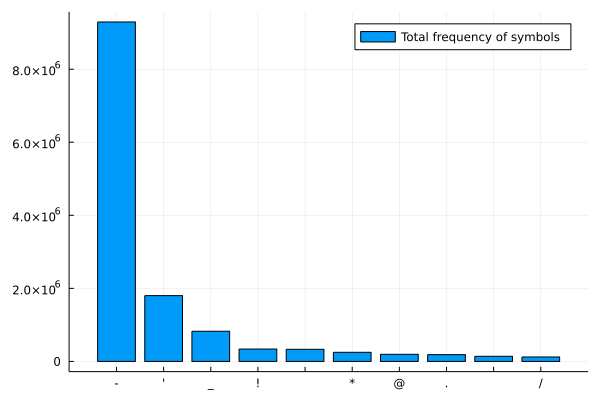

\: undefined symbol


In [9]:
cols = [:Character, :Total]
@df sc_ct_df[1:10,cols] bar(:Character, :Total, label="Total frequency of symbols")

In [10]:
# most frequent special char per position
most_frequent_sc = sc_ct_df[1,:Character]
pos_max_ct = [maximum(get(d,i,0) for d in values(sc_p_counter)) for i in 1:pos_max]
pos_max_sc = [[k for k in keys(sc_p_counter) if sc_p_counter[k][i] === pos_max_ct[i]] for i in 1:length(pos_max_ct)]
for (l,m,i) in zip(pos_max_sc, pos_max_ct, 1:length(pos_max_sc))
    println("Pos $i - $(l[1]) - $m")
end

Pos 1 - * - 44159
Pos 2 - - - 250531
Pos 3 - - - 571998
Pos 4 - - - 955717
Pos 5 - - - 1158304
Pos 6 - - - 1129094
Pos 7 - - - 987934
Pos 8 - - - 836762
Pos 9 - - - 659627
Pos 10 - - - 525047
Pos 11 - - - 399907
Pos 12 - - - 339989
Pos 13 - - - 258550
Pos 14 - - - 221611
Pos 15 - - - 185221
Pos 16 - - - 151140
Pos 17 - - - 126968
Pos 18 - - - 108210
Pos 19 - - - 90232
Pos 20 - - - 77448
Pos 21 - - - 65639
Pos 22 - - - 55144
Pos 23 - - - 43895
Pos 24 - - - 33794
Pos 25 - - - 23053
Pos 26 - - - 14962
Pos 27 - - - 7798
Pos 28 - - - 3831
Pos 29 - - - 1391
Pos 30 - ' - 7


In [11]:
# remove the most frequent and watch again
delete!(sc_p_counter, most_frequent_sc)
pos_max_ct = [maximum(get(d,i,0) for d in values(sc_p_counter)) for i in 1:pos_max]
pos_max_sc = [[k for k in keys(sc_p_counter) if sc_p_counter[k][i] === pos_max_ct[i]] for i in 1:length(pos_max_ct)]
for (l,m,i) in zip(pos_max_sc, pos_max_ct, 1:length(pos_max_sc))
    println("Pos $i - $(l[1]) - $m")
end

Pos 1 - * - 44159
Pos 2 - ' - 145312
Pos 3 - ' - 107273
Pos 4 - ' - 135860
Pos 5 - ' - 150534
Pos 6 - ' - 173781
Pos 7 - ' - 206878
Pos 8 - ' - 208865
Pos 9 - ' - 180419
Pos 10 - ' - 140170
Pos 11 - ' - 104016
Pos 12 - ' - 71886
Pos 13 - ' - 51336
Pos 14 - ' - 37427
Pos 15 - ' - 26666
Pos 16 - ' - 20336
Pos 17 - ' - 12621
Pos 18 - ' - 9173
Pos 19 - ' - 6105
Pos 20 - ' - 4243
Pos 21 - ' - 2644
Pos 22 - ' - 1570
Pos 23 - ' - 1027
Pos 24 - ' - 608
Pos 25 - ' - 380
Pos 26 - ' - 223
Pos 27 - ' - 137
Pos 28 - ' - 90
Pos 29 -   - 79
Pos 30 - ' - 7
